![example](images/waterwell.jpg)

## Tanzanian Water Wells Analysis

**Authors:** Moses Kuria
***

## Overview

WaterAid is an international NGO focused exclusively on ensuring equitable access to safe water, sanitation and hygiene education (WASH) for the world’s poorest communities. Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether. To help them achieve their goal of improving access to water supplies, I have been tasked with exploring data from 59,400 wells that were previously recorded to locate wells needing repair and find patterns in non-functional wells to influence how new wells are built and how the existing wells are repaired. 

## Business Problem
Tanzania is a developing country and much of it does not have access to piped water. To solve the challenge of supplying clean water for their daily needs, wells have been dug throughout the country in rural areas. Water is obtained from these wells through various means such as handpumps, some naturally allow water to flow due to the influence of gravity and so on. To ensure a constant supply of water, the status of the functionality of these wells must be monitored and also predicted. WaterAid wants to be able to predict the status of functionality of a well in order to repair the wells and ensure access to clean water for all. This will, in turn, save numerous lives and also promote the quality of life for all those who depend on the various wells.

To achieve this, I will look at a dataset with information on 59,400 wells to be able to predict the functionality of a well given the features in this dataset. This will be achieved by building a model that will best describe the data and give me accurate and precise predictions.


## Data Understanding

The dataset used was obtained from https://www.drivendata.org/competitions. It contains 59400 rows and 40 features some of which are similar in nature. After importing the necessary packages, I loaded the dataset into pandas dataframes. The target variable and the training values were in different CSV files. I then proceeded to merge the two pandas dataframes to be able to work on a single dataframe. 

Since my aim was to turn this into a binary classification problem, I chose to divide the problem into wells that need repair, and those that do not. This is because a binary classification problem will allow me to use modeling to make predictions. There were some wells that were functional but still needed repair, however, since our goal is to ensure all the wells are in proper working condition, this will fit the data very well. I also explored the missing values and the duplicates. 

I needed to install the following packages as they were not available.

In [1]:
#pip install category_encoders

In [2]:
#pip install dataframe-image

Here, we import the relevant packages. This includes Pandas, Numpy, Sklearn and the methods contained within it, Seaborn and Matplotlib for visualizing the data and so on

In [3]:
#Import relevant packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
import matplotlib.pyplot as plt  
import category_encoders as ce
import warnings     
import datetime as dt
import dataframe_image as dfi
%matplotlib inline

Afterwards, I loaded the data into the pandas dataframes. The data was split into three sets initially; training_set_variables, training_set_values and test_set_values. That resulted in 3 dataframes.

In [4]:
#loading the data variables
df_variables = pd.read_csv('data/training_set_variables.csv')
df_variables.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
#loading feature values
df_train_values = pd.read_csv('data/training_set_values.csv')
df_train_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
#loading test values
df_test_values = pd.read_csv('data/test_set_values.csv')
df_test_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


I merged the training set values and the training set variables; the target, to be able to manipulate and parse the data effectively later. They share an ID and this was what I used to join the two dataframes.

In [7]:
#Merge target and features into 1 dataframe
df = df_variables.merge(df_train_values, left_on='id', right_on='id')
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


I then explored the target variables to see how they were divided up. One can also see that if we were to use the 3 variables, we would end up with a class imbalance issue. Merging the non_functional and functional but needs repair variables into one, "Needs repair" variable, we take care of our binary classification and class imbalance problem.

In [8]:
#Explore target values
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

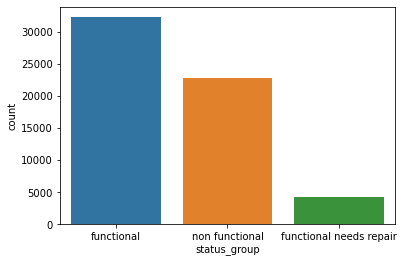

In [9]:
warnings.filterwarnings("ignore", category= FutureWarning)
sns.countplot(df['status_group']);

## Data Preparation

We are only going to focus on water wells that need repair. It doesn't matter if it's functional or not.This will allow us to turn the problem into a binary classification problem from a ternary classification problem. Therefore, we will combine non functional and functional needs repair into one target. To do this, we create a new column called "Target" and assign the functional variable to the value '1'. The rest will be assigned the value '0'. 

In [10]:
#Create a Target column of 0's and 1's
df['target'] = (df['status_group'] == 'functional').astype(int)

Confirming the number of instancesin each category to ensure they are fairly balanced.

In [11]:
#Explore Target value counts
df['target'].value_counts()

1    32259
0    27141
Name: target, dtype: int64

In [12]:
#Explore Target percentages
df['target'].value_counts(normalize=True)

1    0.543081
0    0.456919
Name: target, dtype: float64

Great. The '1' category makes up about 54% of our data, with '0' making up about 46%. Now, we will view how our full dataframe looks like just to get a sense of what we have so far.

In [13]:
#loading the first 5 rows to review
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,1
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1


Now let's get a sense of how our variables are stored and ensure they are in the correct format.

In [14]:
#summary of our dataframe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

Everything looks to be okay. However, there are some columns with missing values. Let us see which ones they are and exactly how many values we are looking at.

In [15]:
df.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

There are quite a significant number of missing values in some columns while others are fewer, with some having no missing values at all. I will not perform any imputation of missing values now, in the interest of avoiding any data leakage. Therefore, I will perform imputation and any necessary preparation after splitting my data later on. I choose to keep all the data to ensure I have as much data as I can to train my model. 

We can take a look at the summary statistics of our numerical columns, however noting that some of them will be affected by the presence of missing values.

In [16]:
#Explore Numeric columns
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,target
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475,0.543081
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547,0.498145
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000,1.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000,1.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000,1.000000


Since some of our columns are categorical, these summary statistics won't mean anything for them. We need to get a sense of how our categorical data looks like.

In [17]:
#Explore Object columns
df[[c for c in df.columns if df[c].dtype == 'object']].describe()

,status_group,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,59400,55765,55745,59400,59400,59029,59400,59400,59400,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,3,356,1897,2145,37400,9,19287,21,125,2092,...,7,8,6,5,5,10,7,3,7,6
top,functional,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,32259,572,9084,17402,3563,10248,508,5294,2503,307,...,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


I want to engineer a feature called "Well Age" that would allow me to predict if a well would need repair. This follows from the logic that an older well would be more prone to issues than a younger well would. Let us check the variable for the number of missing values.

In [18]:
print(df['construction_year'].unique())
print(df['construction_year'].value_counts(normalize=True))

[1999 2010 2009 1986    0 2011 1987 1991 1978 1992 2008 1974 2000 2002
 2004 1972 2003 1980 2007 1973 1985 1970 1995 2006 1962 2005 1997 2012
 1996 1977 1983 1984 1990 1982 1976 1988 1989 1975 1960 1961 1998 1963
 1971 1994 1968 1993 2001 1979 1967 2013 1969 1981 1964 1966 1965]
0       0.348636
2010    0.044529
2008    0.043990
2009    0.042643
2000    0.035202
2007    0.026717
2006    0.024764
2003    0.021650
2011    0.021145
2004    0.018906
2012    0.018249
2002    0.018098
1978    0.017458
1995    0.017071
2005    0.017020
1999    0.016481
1998    0.016263
1990    0.016061
1985    0.015909
1980    0.013653
1996    0.013653
1984    0.013114
1982    0.012525
1994    0.012424
1972    0.011919
1974    0.011380
1997    0.010842
1992    0.010774
1993    0.010236
2001    0.009091
1988    0.008771
1983    0.008215
1975    0.007357
1986    0.007306
1976    0.006970
1970    0.006919
1991    0.005455
1989    0.005320
1987    0.005084
1981    0.004007
1977    0.003401
1979    0.003232
1973  

I wanted to avoid any type of data preprocessing before performing a train test split to avoid any data leakage. However, due to the need to engineer this feature, I will impute the missing values for this column with the median. The number of missing values were too high to impute with the ratio of the data, and there is no signifacnt mode. To impute with the mean would the insignificant as the numerical values have a meaning associated too them. Therefore, median is the best choice.

In [19]:
#imputing the missing values with the median
median = df.construction_year[df.construction_year != 0].median()
df.construction_year.replace(0, median, inplace=True)

Imputing with the median had the effect of skewing our data. We will see how much of an effect this has on our models later.

In [20]:
df['construction_year'].value_counts(normalize=True)

2000    0.383838
2010    0.044529
2008    0.043990
2009    0.042643
2007    0.026717
2006    0.024764
2003    0.021650
2011    0.021145
2004    0.018906
2012    0.018249
2002    0.018098
1978    0.017458
1995    0.017071
2005    0.017020
1999    0.016481
1998    0.016263
1990    0.016061
1985    0.015909
1996    0.013653
1980    0.013653
1984    0.013114
1982    0.012525
1994    0.012424
1972    0.011919
1974    0.011380
1997    0.010842
1992    0.010774
1993    0.010236
2001    0.009091
1988    0.008771
1983    0.008215
1975    0.007357
1986    0.007306
1976    0.006970
1970    0.006919
1991    0.005455
1989    0.005320
1987    0.005084
1981    0.004007
1977    0.003401
1979    0.003232
1973    0.003098
2013    0.002963
1971    0.002441
1960    0.001717
1967    0.001481
1963    0.001431
1968    0.001296
1969    0.000993
1964    0.000673
1962    0.000505
1961    0.000354
1965    0.000320
1966    0.000286
Name: construction_year, dtype: float64

Now we are ready to engineer our feature. First we have to convert the 'date_recorded' column to datetime format, parse the year from the string and subtract the construction year from it to get the age.

In [21]:
#converting to datetime format
#subtarcting construction year from year recorded
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
df['well_age'] = df['date_recorded'].dt.year - df['construction_year']
df['well_age']

0        12
1         3
2         4
3        27
4        11
         ..
59395    14
59396    15
59397    11
59398    11
59399     9
Name: well_age, Length: 59400, dtype: int64

Great. Now we have our feature. 

Knowing how many unique values are in each column will allow us to select the right features for our modelling stage. It is important to pick the right features as it will directly impact how our model performs.

In [22]:
#Number of unique values in the Object columns
df[[c for c in df.columns if df[c].dtype == 'object']].nunique().sort_values(ascending = False)

wpt_name                 37400
subvillage               19287
scheme_name               2696
installer                 2145
ward                      2092
funder                    1897
lga                        125
region                      21
extraction_type             18
extraction_type_group       13
management                  12
scheme_management           12
source                      10
basin                        9
water_quality                8
payment_type                 7
extraction_type_class        7
waterpoint_type              7
source_type                  7
payment                      7
waterpoint_type_group        6
quality_group                6
management_group             5
quantity                     5
quantity_group               5
source_class                 3
status_group                 3
public_meeting               2
permit                       2
recorded_by                  1
dtype: int64

Now, we can see if we can find any relationships between our variables. We will visualize any questions we have. Some of the code used in the visualization was adapted from this source: https://github.com/oac0de/Tanzanian-Water-Well-Classification/blob/master/final_notebook.ipynb

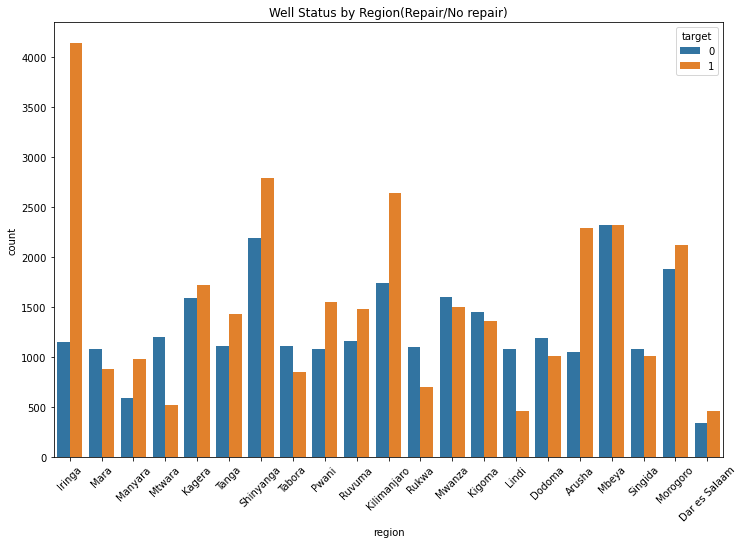

In [23]:
#Visualizing Well status by Region based on needing repair

plt.figure(figsize=(12, 8))

sns.countplot(data=df,x='region',hue='target')
plt.title('Well Status by Region(Repair/No repair)')
plt.xticks(rotation=45);

Most of the areas have more fully functioning wells than ones that need repair. The areas with more wells that need repair should be focused on by WaterAid. These are:
1. Mara
2. Mtwara
3. Tabora
4. Rukwa
5. Mwanza
6. Kigoma
7. Lindi
8. Dodoma
9. Singida

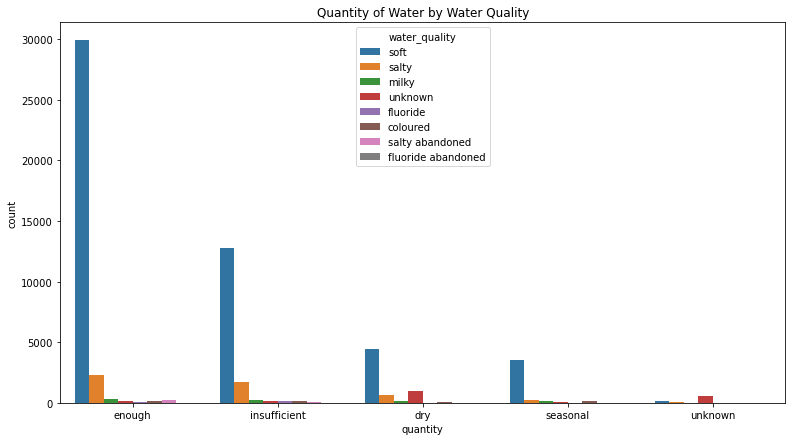

In [24]:
#visualizing amount of water vs quality
plt.figure(figsize=(13, 7))

sns.countplot(data=df,x='quantity',hue='water_quality')
plt.title('Quantity of Water by Water Quality');

There is no discernable pattern as such. One can see, however, soft water is dominant in each of the classifications of wells.

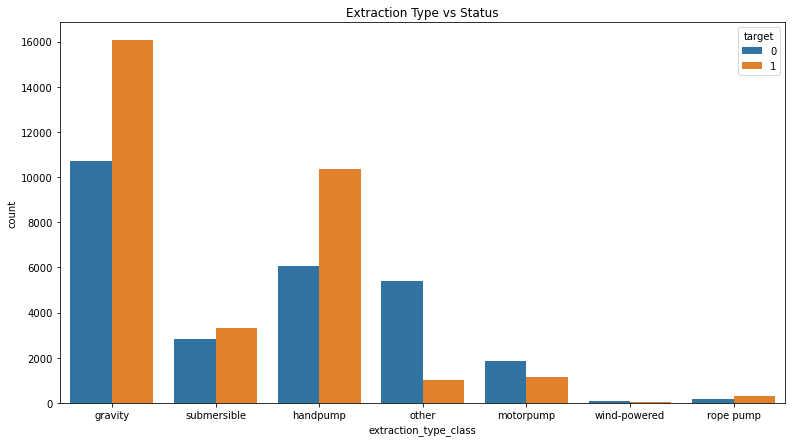

In [25]:
#visualizing number of wells needing repair vs no repair based on Extraction type 

plt.figure(figsize=(13, 7))

sns.countplot(data=df,x='extraction_type_class',hue='target')
plt.title('Extraction Type vs Status');

As expected, the number of wells needing repair are less in gravity and handpump. It would also be expected that the number of wells needing repair in motorpump class would be higher. This could be due to the higher failure rate of the motorpumps as opposed to those infuenced by natural extraction like gravity.

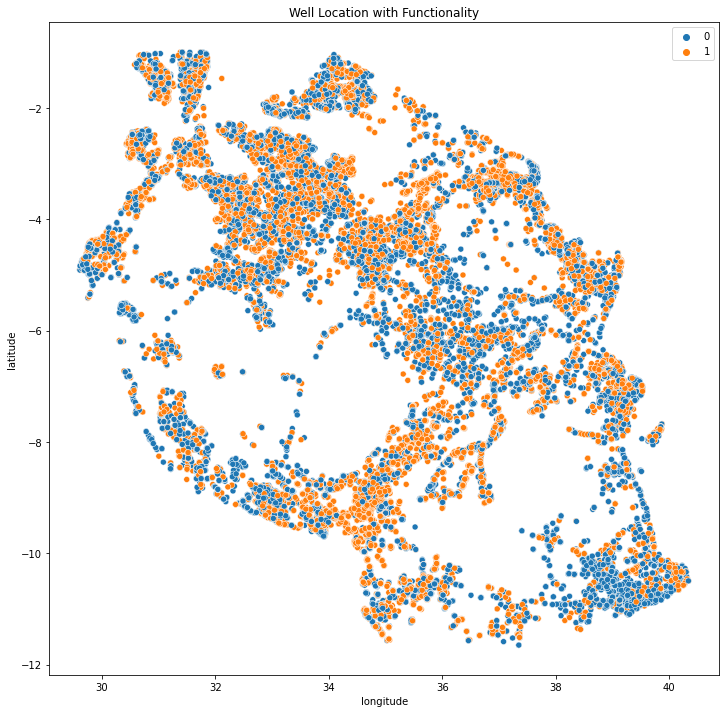

In [26]:
#distribution of the wells needing repair vs no repair

fig, ax = plt.subplots(figsize=(12,12))
df = df[df.longitude != 0]
df = df[df.longitude != -2.000000e-08]
sns.scatterplot(x='longitude', y='latitude', hue='target', data=df, ax=ax)
plt.title('Well Location with Functionality')
plt.legend(fancybox=True);

The distribution of wells across the country seems somewhat even. However, toward the South-east region of the country, there are a large number of wells needing repair. This could be an area that WaterAid can focus on first before moving to other parts of the country. The next area they can focus on is the central areas of Tanzania where I also see a high concentration of the wells needing repair.

To choose the columns that would be used in modelling, I first had to reduce the number of columns as 40 would be too many. Of the highest importance would be to determine which columns would be most relevant to the prediction. First I eliminated the features that were essentially duplicates. Some of these were:
  1. waterpoint_type
  2. source_type
  3. extraction_type
  4. extraction_type_group
  
Then I looked at the features that had too many unique values. Likely, this would have a negative effect on the predictive power of our model. So I dropped them. After, I chose the features that had general attributes that a pattern could be formed from. These are the columns that I used in my model.

In [27]:
#defining columns to be used in modelling
used_cols = ['amount_tsh', 
             'gps_height', 
             'basin', 
             'region',
             'lga',
             'ward',
             'permit',
             'population', 
             'extraction_type_class',
             'quality_group',
             'quantity',
             'source', 
             'source_class',
            'waterpoint_type_group',
            'well_age']

After defining my columns, I defined by target variable and the predictors. This would be my X and y. Having done that, I performed a train-test-split on my data with a test size of 30% the size of my data. I also specified a random state for reproducible results.

In [28]:
#defining my X and y
#performing train_test_split on the data
X = df[used_cols]
y= df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [29]:
#inspecting the training data
X_train

,amount_tsh,gps_height,basin,region,lga,ward,permit,population,extraction_type_class,quality_group,quantity,source,source_class,waterpoint_type_group,well_age
56922,0.0,0,Rufiji,Mbeya,Mbarali,Chimala,True,0,gravity,good,insufficient,river,surface,communal standpipe,11
54116,0.0,1037,Wami / Ruvu,Morogoro,Kilosa,Chakwale,True,80,handpump,salty,enough,shallow well,groundwater,hand pump,15
20980,0.0,0,Internal,Dodoma,Kondoa,Kwadelo,False,0,gravity,good,enough,spring,groundwater,communal standpipe,11
38177,0.0,0,Lake Victoria,Kagera,Chato,Bwanga,True,0,handpump,good,enough,hand dtw,groundwater,hand pump,11
27150,20.0,80,Wami / Ruvu,Dar es Salaam,Ilala,Pugu,False,100,submersible,unknown,dry,machine dbh,groundwater,communal standpipe,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56044,0.0,0,Lake Tanganyika,Kagera,Biharamulo,Lusahunga,True,0,other,good,enough,shallow well,groundwater,other,11
39344,500.0,1806,Rufiji,Iringa,Njombe,Mtwango,True,65,gravity,good,enough,spring,groundwater,communal standpipe,1
884,50.0,91,Wami / Ruvu,Pwani,Kibaha,Soga,True,150,motorpump,good,insufficient,river,surface,communal standpipe,25
16269,50.0,581,Ruvuma / Southern Coast,Mtwara,Newala,Mnekachi,False,1,gravity,good,insufficient,spring,groundwater,communal standpipe,13


Now that the data has been split, I can deal with the missing values. Another reason for dealing with the missing values at this stage is to avoid unnecessary preprocessing. Some of the columns I would have dealt with would have been dropped at the feature selection stage of the data. This makes the process more efficient.

Among the columns I have, they are each of different types. To deal with their missing values would require different techniques. I will automate this process. First, I separated the columns by the type of data contained within them.

In [30]:
# Set up lists for columns requiring different treatment for missing values
num_cols = []
ohe_cols = []
freq_cols = []

for column in X_train.columns:
    if X_train[column].dtype in ['float64', 'int64']:
        num_cols.append(column)
    elif X_train[column].nunique() < 10:
        ohe_cols.append(column)
    else:
        freq_cols.append(column)

In [31]:
print("NUMBER COLUMNS")
print(num_cols)
print('*'*10)
print("OHE COLUMNS")
print(ohe_cols)
print('*'*10)
print("FREQ COLUMNS")
print(freq_cols)

NUMBER COLUMNS
['amount_tsh', 'gps_height', 'population', 'well_age']
**********
OHE COLUMNS
['basin', 'permit', 'extraction_type_class', 'quality_group', 'quantity', 'source_class', 'waterpoint_type_group']
**********
FREQ COLUMNS
['region', 'lga', 'ward', 'source']


Great. Now I can start to deal with the missing values. Another layer of abstraction to deal with are the Boolean data type. Since it is binary in nature, I will separate it and deal with it on its own.

In [32]:
#Create a list of boolean columns and remove from ohe_cols
#This will help with the simple imputer
bool_cols=['permit']
ohe_cols.remove('permit')
print(ohe_cols)

['basin', 'extraction_type_class', 'quality_group', 'quantity', 'source_class', 'waterpoint_type_group']


The strategies chosen for imputation are a reflection of the data type and the number of missing values. To automate the process, I used a pipeline. This will ensure that the step will be repeated for every model that I build. It will also ensure that the process is only occurring on the training data and not the test data.

In [33]:
#Replace null values in numerical columns with the median
num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ])

#Replace null values in boolean columns with 'False'
#Then OneHotEncode the columns
bool_transformer = Pipeline(steps=[
    ('bool_imputer', SimpleImputer(strategy='constant', fill_value=False)),
    ('bool_encoder', OneHotEncoder(handle_unknown='error'))
])

#Replace null values in categorical columns with 'Unknown'
#Then OneHotEncode the columns
ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('oh_encoder', OneHotEncoder(handle_unknown='error'))
])

#Replace null values in categorical columns that have a high number of unique values with 0
#Then use a CountEncoder on the columns
freq_transformer = Pipeline(steps=[
    ('freq_imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05))
])

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols)
    ])

In [35]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['amount_tsh', 'gps_height', 'population',
                                  'well_age']),
                                ('ohe',
                                 Pipeline(steps=[('ohe_imputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('oh_encoder',
                                                  OneHotEncoder())]),
                                 ['basin', 'extraction_type_class',
                                  'quality_group', 'quantity', 'source_class',
                                  'waterpoint_type_group']),
                                ('freq',
                                 Pipeline(steps=[('freq_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True))]),
                                 ['region', 'lga', 'ward', 'source'])])

## Modelling 
I chose to build models to solve the particular problem at hand. The goal was to achieve prediction of needing repair or not needing repair data on wells to work with. Exploratory data analysis will tell me the current state of the wells. Modeling will enable me to predict their status given certain features to work with.

The goal is to start easy and work my way to harder and more complex models. I aim to build 4 models and their hyperparameter tuned counterparts. These are:
1. DecisionTreeClassifier
2. LogisticRegressor
3. RandomForestClassifier
4. K-Nearest Neighbors(KNN)

The models suit this problem well because they are classifiers, and this is a classification problem. Some of them double as regressors, however, I will only focus on their classification element.

Starting with our baseline accuracy,I can improve from there. If each of our models predicted every well to be functional, meaning it does not need repair, it would be 54% accurate. From there, we can compare the final accuracy numbers to see how each model performs.

Accuracy will be the main metric used to evaluate these models. This is because we want the model to be able to correctly classify the wells above all else. The rest of the metrics will be used as support metrics.

## Model 1 :DecisionTreeClassifier

For my first model, I chose the DecisionTreeClassifier. It is a simple model that will provide us with a baseline to be able to improve upon. To be able to instantiate my model, I will call on my preprocessor pipeline and add it to the pipeline that will instantiate the DecisionTreeClassifier. This will allow me to do all the steps needed in one line of code and automate the process should I need to use it later.

In [36]:
# Create a pipeline for default Desicion Tree Classifier
pipe_dtc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('dtc', DecisionTreeClassifier(random_state=42))
])

The next step is to fit the model on the training data. 

In [37]:
#fitting the model on the data
pipe_dtc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population', 'well_age']),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('oh_encoder',
                                                                   OneHotEncoder())]),
                                                  ['basin',
                                                   'extraction_type_class',
                                                   'quality_group', 'quantity',
                                                   'source_class',
                                                   'waterpoint_type_group']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True))]),
                                                  ['region', 'lga', 'ward',
                                                   'source'])])),
                ('dtc', DecisionTreeClassifier(random_state=42))])

Good. Now the model has learnt from the training data. The next step is to make predictions on the training data and the test data. The training predictions serve as a metric, enabling me to later know how well the model did at learning from the training data. It will also let me know if the model has overfit on the training and will give me a starting point on improving the model.

In [38]:
#Make predictions for model
train_preds = pipe_dtc.predict(X_train)
test_preds = pipe_dtc.predict(X_test)


One way to evaluate how our data did is to see how many values were correctly predicted and incorrectly predicted. This can be achieved by using a confusion matrix. This shows the number of True Positives, True Negatives, False Negatives and False Positives in our predictions. This is a visual way of seeing the main metrics we use to evaluate our models; 
1. Accuracy
2. Recall
3. Precision
4. F1 Score.

I plotted a Confusion Matrix.

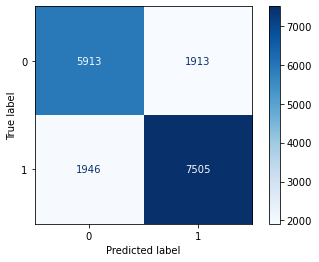

In [39]:
#Visualize Confusion Matrix
cnf_matrix_1 = confusion_matrix(test_preds, y_test)
disp = cmd(confusion_matrix = cnf_matrix_1)
disp.plot(cmap = plt.cm.Blues);

The model did reasonably well at predicting which values didn't need repair and which ones needed repair. However, this doesn't tell me much. The metrics I mentioned earlier will do a better job of this. I defined a function that took in the predictions, training data and test data to give me back this metrics. This is how the model performed.

In [40]:
#defining a function to get evaluation metrics

def get_metrics(train_prediction, test_prediction, y_train_data, y_test_data):
    print("Train Scores:"), 
    print(f"Train Accuracy: {accuracy_score(y_train_data, train_prediction)}"),
    print(f"Train Precision: {precision_score(y_train_data, train_prediction)}"),
    print(f"Train Recall: {recall_score(y_train_data, train_prediction)}"),
    print(f"Train F1-Score: {f1_score(y_train_data, train_prediction)}"),
    print("---------------"),
    print("Test Scores:"),
    print(f"Test Accuracy: {accuracy_score(y_test_data, test_prediction)}"),
    print(f"Test Precision: {precision_score(y_test_data, test_prediction)}"),
    print(f"Test Recall: {recall_score(y_test_data, test_prediction)}"),
    print(f"Test F1-Score: {f1_score(y_test_data, test_prediction)}")
    return all

In [41]:
# Evaluate Train and Test Scores
get_metrics(train_preds, test_preds, y_train, y_test);

Train Scores:
Train Accuracy: 0.9564386891915359
Train Precision: 0.9600382322151928
Train Recall: 0.9600382322151928
Train F1-Score: 0.9600382322151928
---------------
Test Scores:
Test Accuracy: 0.7766394628697112
Test Precision: 0.7940958628716538
Test Recall: 0.7968783181142494
Test F1-Score: 0.7954846573745297


The training scores are very high. In comparison, the test scores aren't as high. The model shows signs of overfitting on the training data. In later iterations I shall fix this issue. For now, I'll build a logistic regression model and see how it compares. 

## Model 2 : LogisticRegression

Logistic Regression is another simple model. I have chosen to use it in comparison to the DecisionTreeClassifier to see which one will perform better as a baseline model. It works for our use case here because it deals with binary classification. To instantiate, we will repeat the same steps we did for the Decision Tree.

In [42]:
#creating pipeline for logistic regression
pipe_log = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear'))
])

As usual, we will fit the model to the training data.

In [43]:
#fitting pipeline to training data
pipe_log.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population', 'well_age']),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('oh_encoder',
                                                                   OneHotEncoder())]),
                                                  ['basin',
                                                   'extraction_type_class...
                                                   'source_class',
                                                   'waterpoint_type_group']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True))]),
                                                  ['region', 'lga', 'ward',
                                                   'source'])])),
                ('logreg',
                 LogisticRegression(C=1000000000000.0, fit_intercept=False,
                                    solver='liblinear'))])

Next I will make predictions using the test and training data that I will use in my confusion matrix and my evaluation metrics.

In [44]:
#making predictions 
train_preds_2 = pipe_log.predict(X_train)
test_preds_2 = pipe_log.predict(X_test)


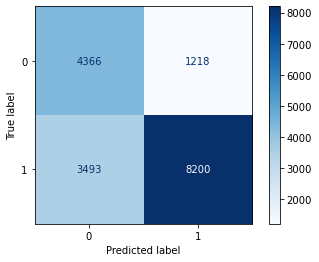

In [45]:
#creating confusion matrix
cnf_matrix_2 = confusion_matrix(test_preds_2, y_test)
disp = cmd(confusion_matrix = cnf_matrix_2)
disp.plot(cmap = plt.cm.Blues);

Our model does really well at identifying the true positives, however, does a bit worse at identifying the true negatives. The False negatives are way higher, which has affected our accuracy score below. It is good to note that the model has not overfit on the data, indicated by the train and test scores being quite similar. The model actually performs marginally better on the test data. The scores are not as good, and more fine-tuning is needed on this model.

In [46]:
#getting evaluation metrics for model
get_metrics(train_preds_2, test_preds_2, y_train, y_test);

Train Scores:
Train Accuracy: 0.7267495224628513
Train Precision: 0.7001607717041801
Train Recall: 0.8721496518137545
Train F1-Score: 0.7767486167129452
---------------
Test Scores:
Test Accuracy: 0.7273253458355039
Test Precision: 0.7012742666552638
Test Recall: 0.8706731790189
Test F1-Score: 0.7768461939273364


## Model 3: RandomForestClassifier

Here I decided to build a more complex model that takes advantage of ensemble methods. Since an average of scores is generally better than one score, I took advantage of RandomForestClassifier that does the the average of many trees and gives me an optimized score. The process of instantiation is the same as before.

In [47]:
#Instantiate a Random Forest Classifier inside this new pipeline
pipe_rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfc', RandomForestClassifier(random_state=42))
])

Next, I fit the model to the training data. 

In [48]:
#Fit the Model to X_train_used_cols and y_train
pipe_rfc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population', 'well_age']),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('oh_encoder',
                                                                   OneHotEncoder())]),
                                                  ['basin',
                                                   'extraction_type_class',
                                                   'quality_group', 'quantity',
                                                   'source_class',
                                                   'waterpoint_type_group']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True))]),
                                                  ['region', 'lga', 'ward',
                                                   'source'])])),
                ('rfc', RandomForestClassifier(random_state=42))])

In [49]:
#Make predictions with this model
train_preds_3 = pipe_rfc.predict(X_train)
test_preds_3= pipe_rfc.predict(X_test)


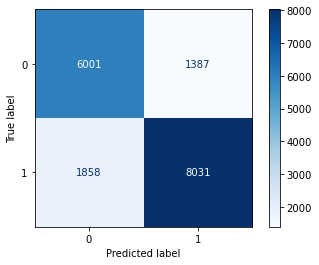

In [50]:
#creating confusion matrix
cnf_matrix_3 = confusion_matrix(test_preds_3, y_test)
disp = cmd(confusion_matrix = cnf_matrix_3)
disp.plot(cmap = plt.cm.Blues);

The model performs really well at classifying the true negatives and the true positives. The number of false predictions are lower than in the previous models.

In [51]:
#getting metrics for model
get_metrics(train_preds_3, test_preds_3, y_train, y_test);

Train Scores:
Train Accuracy: 0.9564386891915359
Train Precision: 0.9523383307227568
Train Recall: 0.9685494515497701
Train F1-Score: 0.9603754851520896
---------------
Test Scores:
Test Accuracy: 0.8121780401690109
Test Precision: 0.8121144706239256
Test Recall: 0.8527288171586324
Test F1-Score: 0.8319262443673279


A quick look at the evaluation metrics tells me that the model still suffers from a bit of overfitting on the training data. Tuning this model will help with those issues. Before that, I will build one more model and see its performance.

## Model 4: KNN

K-nearest neighbours. How well will it perform at classification? I'll instantiate and find out.

In [52]:
#creating pipeline for model
pipe_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

In [53]:
#fitting pipeline to training data
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population', 'well_age']),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('oh_encoder',
                                                                   OneHotEncoder())]),
                                                  ['basin',
                                                   'extraction_type_class',
                                                   'quality_group', 'quantity',
                                                   'source_class',
                                                   'waterpoint_type_group']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True))]),
                                                  ['region', 'lga', 'ward',
                                                   'source'])])),
                ('knn', KNeighborsClassifier())])

In [54]:
#Make predictions with this model
train_preds_4 = pipe_knn.predict(X_train)
test_preds_4= pipe_knn.predict(X_test)


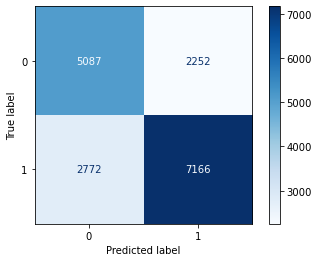

In [55]:
#creating confusion matrix
cnf_matrix_4 = confusion_matrix(test_preds_4, y_test)
disp = cmd(confusion_matrix = cnf_matrix_4)
disp.plot(cmap = plt.cm.Blues);

From the Confusion Matrix, I can already see that this model is the worst model so far. The number of true predictions are collectively lower and the number of false predictions are collectively higher.

In [56]:
#getting evaluation metrics for our model
get_metrics(train_preds_4, test_preds_4, y_train, y_test);

Train Scores:
Train Accuracy: 0.7943489370147107
Train Precision: 0.795116269036628
Train Recall: 0.8388330071457831
Train F1-Score: 0.816389811738649
---------------
Test Scores:
Test Accuracy: 0.7092087746715287
Test Precision: 0.721070637955323
Test Recall: 0.7608834147377362
Test F1-Score: 0.7404422401322587


From the evaluation metrics, I can see that the model also shows signs of overfitting on the training data. I will tune the model and improve on the scores.

## Model 5: DecisionTreeClassifier(Hyperparameter tuned)

I've built 4 models so far but none of them have been performing at their best. It is time to tune their Hyperparameters to get the best possible scores from the model. In particular, I want to score for accuracy. Accurate results are more important to me and WaterAid. The first model I will tune is DecisionTreeClassifier. 

To tune the hyperparameters, I first have to create a parameter grid; a dictionary containing both the parameters I will be tuning and the array of values I want to find the best parameter from. Next, I will use GridSearchCV which will search through the entire parameter grid trying every possible combination of values to come up with the best parameters.


In [57]:
#creating parameter grid for our DecisionTreeClassifier
param_grid_dtc = {
    "dtc__max_depth" :[int(x) for x in np.linspace(start = 1, stop = 80, num = 10)] ,
    "dtc__min_samples_leaf" : [int(x) for x in np.linspace(start = 1, stop = 30, num = 5)] ,
    "dtc__random_state":[42]
}

Now I can instantiate the GridSearchCV and pass the model, the parameter grid, the scoring and the number of cross validations to be able to find the best parameters.

In [58]:
#instantiating GridSearchCV 
dtc_grid = GridSearchCV(estimator = pipe_dtc, param_grid=param_grid_dtc,scoring = 'accuracy', cv = 3)

Next, I fit the Grid to the training data and allow the grid search tp come up with the best parameters.

In [59]:
#fitting GridSearechCV to the training data
dtc_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['amount_tsh',
                                                                          'gps_height',
                                                                          'population',
                                                                          'well_age']),
                                                                        ('ohe',
                                                                         Pipeline(steps=[('ohe_imputer',
                                                                                          SimpleImputer(fill_value='Unknown',
                                                                                                        strategy='constant')),
                                                                                         ('oh_encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['b...
                                                                                          SimpleImputer(fill_value=0,
                                                                                                        strategy='constant')),
                                                                                         ('freq_encoder',
                                                                                          CountEncoder(combine_min_nan_groups=True,
                                                                                                       min_group_size=0.05,
                                                                                                       normalize=True))]),
                                                                         ['region',
                                                                          'lga',
                                                                          'ward',
                                                                          'source'])])),
                                       ('dtc',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'dtc__max_depth': [1, 9, 18, 27, 36, 44, 53, 62, 71,
                                            80],
                         'dtc__min_samples_leaf': [1, 8, 15, 22, 30],
                         'dtc__random_state': [42]},
             scoring='accuracy')

Now, I can retreive the best parameters from GridSearch's best_params_ and use them to build a new model.

In [60]:
#getting the best hyperparameters for our model
dtc_grid.best_params_

{'dtc__max_depth': 36, 'dtc__min_samples_leaf': 8, 'dtc__random_state': 42}

Great. Now I can build the new model and see how well it does. The process of building the new model will be the same as I did when I built the first model.

In [61]:
#instantating a new pipeline with the new parameters
pipe_dtc_tuned = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('dtc', DecisionTreeClassifier(max_depth = 36, min_samples_leaf = 8, random_state=42))
])

In [62]:
#fitting the new pipeline to the training data
pipe_dtc_tuned.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population', 'well_age']),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('oh_encoder',
                                                                   OneHotEncoder())]),
                                                  ['basin',
                                                   'extraction_type_class',
                                                   'quality_group', 'quantity',
                                                   'source_class',
                                                   'waterpoint_type_group']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True))]),
                                                  ['region', 'lga', 'ward',
                                                   'source'])])),
                ('dtc',
                 DecisionTreeClassifier(max_depth=36, min_samples_leaf=8,
                                        random_state=42))])

In [63]:
#making predictions using the training and test data
train_preds_5 = pipe_dtc_tuned.predict(X_train)
test_preds_5 = pipe_dtc_tuned.predict(X_test)

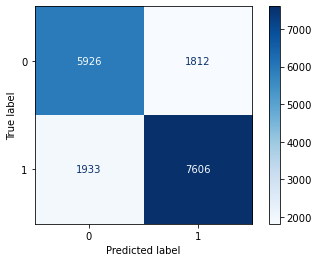

In [64]:
#constructing confusion matrix
cnf_matrix_5 = confusion_matrix(test_preds_5, y_test)
disp = cmd(confusion_matrix = cnf_matrix_5)
disp.plot(cmap = plt.cm.Blues);

In [65]:
#getting new metrics to show improvements
get_metrics(train_preds_5, test_preds_5, y_train, y_test);

Train Scores:
Train Accuracy: 0.8501649673786311
Train Precision: 0.85734152797093
Train Recall: 0.8698284101770516
Train F1-Score: 0.8635398310062808
---------------
Test Scores:
Test Accuracy: 0.7832378306418939
Test Precision: 0.7973582136492294
Test Recall: 0.8076024633680187
Test F1-Score: 0.8024476446695151


Using our evaluation metrics, we can see our model accuracy has improved from 0.77  to 0.78. The increase is marginal. However, the new model also outperforms the old one in all the other metrics. The overfitting is less overall but still significant.

## Model 6: LogisticRegression(Hyperparameter tuned)

The same process will also follow for logistic regression tuning. The only difference is the hyperparameters being tuned.

In [66]:
#creating parameter grid for logistic regression
logreg_pg = {
    "logreg__class_weight": ['balanced'],
    "logreg__max_iter": [500],
    "logreg__C":[0.1, 1.0, 10.0],
    "logreg__solver": ['liblinear', 'sag', 'saga']
}

In [67]:
#instantiating GridSearchCV with the inputs
logreg_grid = GridSearchCV(estimator = pipe_log, param_grid=logreg_pg, scoring = 'accuracy', cv = 3)

In [68]:
#fitting GridSearchCV to the training data
logreg_grid.fit(X_train, y_train)

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\envs\learn-env\l

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['amount_tsh',
                                                                          'gps_height',
                                                                          'population',
                                                                          'well_age']),
                                                                        ('ohe',
                                                                         Pipeline(steps=[('ohe_imputer',
                                                                                          SimpleImputer(fill_value='Unknown',
                                                                                                        strategy='constant')),
                                                                                         ('oh_encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['b...
                                                                                          CountEncoder(combine_min_nan_groups=True,
                                                                                                       min_group_size=0.05,
                                                                                                       normalize=True))]),
                                                                         ['region',
                                                                          'lga',
                                                                          'ward',
                                                                          'source'])])),
                                       ('logreg',
                                        LogisticRegression(C=1000000000000.0,
                                                           fit_intercept=False,
                                                           solver='liblinear'))]),
             param_grid={'logreg__C': [0.1, 1.0, 10.0],
                         'logreg__class_weight': ['balanced'],
                         'logreg__max_iter': [500],
                         'logreg__solver': ['liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [69]:
#viewing best parameters for model
logreg_grid.best_params_

{'logreg__C': 0.1,
 'logreg__class_weight': 'balanced',
 'logreg__max_iter': 500,
 'logreg__solver': 'liblinear'}

In [70]:
#making predictions using training and test data
train_preds_6 = logreg_grid.best_estimator_.predict(X_train)
test_preds_6 = logreg_grid.best_estimator_.predict(X_test)

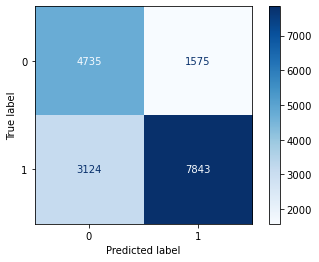

In [71]:
#constructing confusion matrix
cnf_matrix_6 = confusion_matrix(test_preds_6, y_test)
disp = cmd(confusion_matrix = cnf_matrix_6)
disp.plot(cmap = plt.cm.Blues);

In [72]:
get_metrics(train_preds_6, test_preds_6, y_train, y_test);

Train Scores:
Train Accuracy: 0.7250378308650244
Train Precision: 0.7119000350344505
Train Recall: 0.8323699421965318
Train F1-Score: 0.7674360050356694
---------------
Test Scores:
Test Accuracy: 0.7280199108641546
Test Precision: 0.7151454363089268
Test Recall: 0.8327670418347844
Test F1-Score: 0.7694873681628648


## Model 7: RandomForestClassifier(Hyperparameter tuned)


Here, I tuned my most accurate model to come up with a better model. The process is also similar to the others, only that the parameters are different.

In [73]:
#Create a Parameter Grid
param_grid_rfc = {
    "rfc__max_depth" :[int(x) for x in np.linspace(start = 1, stop = 80, num = 10)] ,
    "rfc__min_samples_leaf" : [int(x) for x in np.linspace(start = 1, stop = 30, num = 5)] ,
    "rfc__n_estimators":[int(x) for x in np.linspace(start = 10, stop = 80, num = 10)] ,
    "rfc__class_weight" :['balanced'],
    "rfc__random_state":[42]
}

In [74]:
#instantiating GridSearchCV with the inputs
rf_Grid = GridSearchCV(estimator = pipe_rfc, param_grid = param_grid_rfc, scoring = 'accuracy', cv = 3, verbose=2, n_jobs = 4)

In [75]:
#Fit the GridSearchCV on the training data
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['amount_tsh',
                                                                          'gps_height',
                                                                          'population',
                                                                          'well_age']),
                                                                        ('ohe',
                                                                         Pipeline(steps=[('ohe_imputer',
                                                                                          SimpleImputer(fill_value='Unknown',
                                                                                                        strategy='constant')),
                                                                                         ('oh_encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['b...
                                                                                                       normalize=True))]),
                                                                         ['region',
                                                                          'lga',
                                                                          'ward',
                                                                          'source'])])),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=4,
             param_grid={'rfc__class_weight': ['balanced'],
                         'rfc__max_depth': [1, 9, 18, 27, 36, 44, 53, 62, 71,
                                            80],
                         'rfc__min_samples_leaf': [1, 8, 15, 22, 30],
                         'rfc__n_estimators': [10, 17, 25, 33, 41, 48, 56, 64,
                                               72, 80],
                         'rfc__random_state': [42]},
             scoring='accuracy', verbose=2)

In [76]:
#viewing the best parameters for our model
rf_Grid.best_params_

{'rfc__class_weight': 'balanced',
 'rfc__max_depth': 18,
 'rfc__min_samples_leaf': 1,
 'rfc__n_estimators': 80,
 'rfc__random_state': 42}

In [77]:
#instantiating a new pipeline with the best parameters
#fitting the new pipeline to the training data
pipe_rfc_tuned =  Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfc', RandomForestClassifier(max_depth = 18, 
                                   n_estimators = 80,
                                   min_samples_leaf = 1,
                                   class_weight = 'balanced', 
                                   random_state=42))
])

pipe_rfc_tuned.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population', 'well_age']),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('oh_encoder',
                                                                   OneHotEncoder())]),
                                                  ['basin',
                                                   'extraction_type_class...
                                                   'waterpoint_type_group']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True))]),
                                                  ['region', 'lga', 'ward',
                                                   'source'])])),
                ('rfc',
                 RandomForestClassifier(class_weight='balanced', max_depth=18,
                                        n_estimators=80, random_state=42))])

In [78]:
#make predictions for model
train_preds_7 = pipe_rfc_tuned.predict(X_train)
test_preds_7 = pipe_rfc_tuned.predict(X_test)

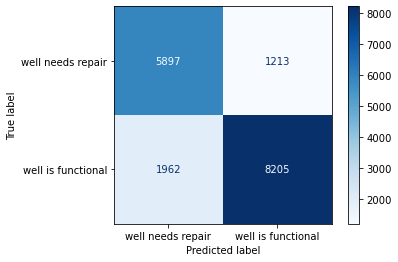

In [79]:
#creating a confusion matrix for visualization
cnf_matrix_7 = confusion_matrix(test_preds_7, y_test)
disp = cmd(confusion_matrix = cnf_matrix_7,  display_labels = ['well needs repair','well is functional'])
disp.plot(cmap = plt.cm.Blues);
plt.savefig('./images/confusionmatrix', facecolor = 'white')

In [80]:
#getting the evaluation metrics
get_metrics(train_preds_7, test_preds_7, y_train, y_test);

Train Scores:
Train Accuracy: 0.9062786832378259
Train Precision: 0.8912641403931352
Train Recall: 0.9431068226298303
Train F1-Score: 0.9164528969482529
---------------
Test Scores:
Test Accuracy: 0.8162296695028072
Test Precision: 0.8070227205665388
Test Recall: 0.8712040772987896
Test F1-Score: 0.8378861373500126


In [81]:
#creating table with metrics for export
report = {"Accuracy": 0.816229,
"Precision": 0.807022,
"Recall": 0.871204,
"F1-Score": 0.837886}
df = pd.DataFrame(report.values(), index = report.keys())
df.set_axis(['Metrics'], axis = 'columns', inplace = True)
df_styled = df.style.background_gradient()
df_styled

,Metrics
Accuracy,0.816229
Precision,0.807022
Recall,0.871204
F1-Score,0.837886


In [82]:
#exporting table 
dfi.export(df_styled, './images/df_styled.png')

The accuracy of the model has incresed from 0.812 to 0.816, which is a very small increase. Precision of the model decreased marginally as Recall and F1 score increased. The model has also reduced the overfitting on the training data. 

## Model 8: KNN(Hyperparameter tuned)

I underwent a similar process for K-Nearest Neighbours. 

In [83]:
#creating a parameter grid for KNN
param_grid = [{
    'knn__n_neighbors': [int(x) for x in np.linspace(start = 1, stop = 80, num = 10)],
    'knn__weights': ['distance']}]

In [84]:
#instantiating GridSearchCV withh the inputs
grid = GridSearchCV(pipe_knn, param_grid, scoring = 'accuracy', cv = 5)

In [85]:
#fitting GridSearchCV to the training data
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['amount_tsh',
                                                                          'gps_height',
                                                                          'population',
                                                                          'well_age']),
                                                                        ('ohe',
                                                                         Pipeline(steps=[('ohe_imputer',
                                                                                          SimpleImputer(fill_value='Unknown',
                                                                                                        strategy='constant')),
                                                                                         ('oh_encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['b...
                                                                         Pipeline(steps=[('freq_imputer',
                                                                                          SimpleImputer(fill_value=0,
                                                                                                        strategy='constant')),
                                                                                         ('freq_encoder',
                                                                                          CountEncoder(combine_min_nan_groups=True,
                                                                                                       min_group_size=0.05,
                                                                                                       normalize=True))]),
                                                                         ['region',
                                                                          'lga',
                                                                          'ward',
                                                                          'source'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__n_neighbors': [1, 9, 18, 27, 36, 44, 53, 62, 71,
                                               80],
                          'knn__weights': ['distance']}],
             scoring='accuracy')

In [86]:
#viewing the best parameters for our model
grid.best_params_

{'knn__n_neighbors': 18, 'knn__weights': 'distance'}

In [87]:
#insantiating new pipeline with the best parameters
#fitting the new pipeline to the training data
pipe_knn_tuned = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=10, weights='distance'))
])
pipe_knn_tuned.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population', 'well_age']),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('oh_encoder',
                                                                   OneHotEncoder())]),
                                                  ['basin',
                                                   'extraction_type_class',
                                                   'quality_group', 'quantity',
                                                   'source_class',
                                                   'waterpoint_type_group']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True))]),
                                                  ['region', 'lga', 'ward',
                                                   'source'])])),
                ('knn',
                 KNeighborsClassifier(n_neighbors=10, weights='distance'))])

In [88]:
#making predictions with this model
train_preds_8 = pipe_knn_tuned.predict(X_train)
test_preds_8= pipe_knn_tuned.predict(X_test)


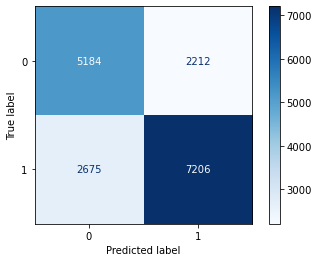

In [89]:
#creating a confusion matrix
cnf_matrix_8 = confusion_matrix(test_preds_8, y_test)
disp = cmd(confusion_matrix = cnf_matrix_8)
disp.plot(cmap = plt.cm.Blues);

In [90]:
#getting the evaluation metrics
get_metrics(train_preds_8, test_preds_8, y_train, y_test);

Train Scores:
Train Accuracy: 0.9556200540795317
Train Precision: 0.9590156477438136
Train Recall: 0.9595830867962314
Train F1-Score: 0.9592992833579798
---------------
Test Scores:
Test Accuracy: 0.7171383920819586
Test Precision: 0.7292784131160813
Test Recall: 0.7651306009768528
Test F1-Score: 0.7467744442717239


As expected, the accuracy of the model increased after tuning. All the other metrics also improved.

## Model 9: BaggingClassifier with RandomForestClassifier

This is an alternate approach to try and improve the prediction made by RandomForestClassifier. It is a similar method to the one employed innately by RandomForestClassifier, but by bagging, we increase the aggregation element of the models coming up with more accurate and less overfit results, in theory.

In [91]:
#instantiating a new model to test
#creating pipeline for new model
#fitting the pipeline to new model
pipe_bagged_rfc =Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('brfc', BaggingClassifier(RandomForestClassifier(n_estimators=80, max_depth=18, min_samples_leaf=1,
                                                    class_weight = 'balanced', random_state = 42)))
])
pipe_bagged_rfc.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population', 'well_age']),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('oh_encoder',
                                                                   OneHotEncoder())]),
                                                  ['basin',
                                                   'extraction_type_class...
                                                 ('freq',
                                                  Pipeline(steps=[('freq_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True))]),
                                                  ['region', 'lga', 'ward',
                                                   'source'])])),
                ('brfc',
                 BaggingClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                                    max_depth=18,
                                                                    n_estimators=80,
                                                                    random_state=42)))])

In [92]:
#,aking predictions using the model
train_preds_9 = pipe_bagged_rfc.predict(X_train)
test_preds_9 = pipe_bagged_rfc.predict(X_test)

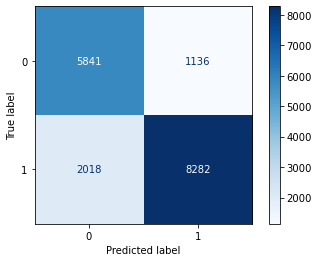

In [93]:
#creating confusion matrix for visualization
cnf_matrix_9 = confusion_matrix(test_preds_9, y_test)
disp = cmd(confusion_matrix = cnf_matrix_9)
disp.plot(cmap = plt.cm.Blues);

In [94]:
#getting the evaluation metrics
get_metrics(train_preds_9, test_preds_9, y_train, y_test);

Train Scores:
Train Accuracy: 0.8874500756617301
Train Precision: 0.869364406779661
Train Recall: 0.9338218560830185
Train F1-Score: 0.9004410699787145
---------------
Test Scores:
Test Accuracy: 0.8174451583029461
Test Precision: 0.8040776699029126
Test Recall: 0.879379910809089
Test F1-Score: 0.8400446292727457


## Evaluation
We ran a total of 9 models, the baseline models and their hyperparameter tuned versions. The performance of the models varied with some overfitting on the training data and some not performing as well as expected. Notably, the performance of the logistic regressor reduced when I hyperparameter tuned the model. I attribute this to not having a wide enough search space for the best parameters. This can be improved upon in other iterations of the model. 

These were how the models performed in terms of accuracy:

1. RandomForestClassifier - 0.816 (81.6%)
2. BaggingClassifier with RandomForestClassifier - 0.815 (81.5%)
3. DecisionTreeClassifier - 0.78 (78.3%)
4. LogisticRegression - 0.728 (72.8%)
5. KNN - 0.717 (71.7%)

The best performing model was RandomForestClassifier. This is therefore, our final model. The model fits our data well with these being the other evaluation metrics:

1. Precision score - 0.807 (80.7%)
2. Recall - 0.871 (87.1%)
3. F1 score - 0.837 (83.7%)

I am confident that the model would generalize beyond the current data due to the high scores on the test data. This indicates that the model is able to learn and predict properly. The model also performed well due to the data we put into it. Good input data generates good outputs. 

The model would serve WaterAid well in its pursuit to know which wells need repair and make a real impact on the people of Tanzania.



## Conclusion

Our final model that performed best was a RandomForestClassifier. It had an accuracy = 0.816, precision score = 0.807, Recall = 0.871 and an F1 score = 0.837.

Based on the results of this work, I would recommend WaterAid to use this model only in the context specified by the problem i.e only when finding wells that need repair and those that do not. Beyond that, the model cannot guarantee the high performance achieved. It also cannot predict when a well will stop being functional, only when it is actually not functional. Inference from a human entity is needed in this scenario.

WaterAid should also gather more data on the features used to build the model as well as more relevant details such as Consumption of water to be able to make the model better. 

The analysis, though comprehensive, might not fully solve the problem at hand. One of the constraints I suffered was time. Given more time, better models could have been built. I was also limited by the machine I used. Some of the techniques like hyperparameter tuning are computationally expensive. They have long run-times and hence, limitation on how these techniques are used is required. 

In future, the model can be improved by engineering new features that might be more relevant to the problem at hand. More robust techniques can also be used to clean the data, as well as collection of actual data to avoid imputation. More computation power can be added to effectively make use of hyperparameter tuning with GridSearchCV.